<a href="https://colab.research.google.com/github/Narissarach/Project_eye/blob/main/Train%20fruit%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://upscfever.com/upsc-fever/en/programming/tensorflow/16.html

In [1]:
import tensorflow as tf
import PIL
import time
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pickle as p
import plotly
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json
import plotly.graph_objs as go
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## เตรียมชุดของข้อมูล

In [73]:
from google.colab import drive # เชื่อม drive ของเรา ถ้าเชื่อมสำเร็จจะขึ้นคำว่า Mounted at /content/drive 
drive.mount('/content/drive')
path = '/content/drive/My Drive/fruit data/train'  # ชี้ว่า data เราอยู่โฟล์เดอร์ไหน

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
import pathlib
data_dir = pathlib.Path('/content/drive/My Drive/fruit data/train')

In [75]:
batch_size = 15   # กำหนดขนาดของแต่ละการอ่านข้อมูล
img_height = 150  # ความสูงของรูปภาพแต่ละรูป
img_width = 150   # ความกว้างของรูปภาพแต่ละรูป

## Train

In [76]:
train = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
validation_split=0.1, # s แบ่งข้อมูล เพื่อ training 90% และ validation 10%
subset="training",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)
val = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.1,
subset="validation",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 35 files belonging to 5 classes.
Using 32 files for training.
Found 35 files belonging to 5 classes.
Using 3 files for validation.


In [77]:
class_names = train.class_names
print(class_names)

['apple1', 'banana1', 'mangosteen1', 'orange1', 'pineapple1']


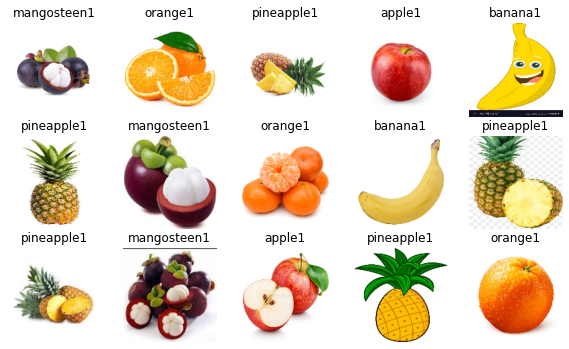

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10)) #ขนาด
for images, labels in train.take(1):
  for i in range(15): #มี 15 รูป
    ax = plt.subplot(5, 5, i + 1) #แถวละ 5
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [79]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(15, 150, 150, 3)
(15,)


## Normalization

In [80]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


## Model

In [81]:
num_classes = 5
epochs=20   # จำนวนครั้งที่เราจะ Train

In [82]:
model = Sequential([
layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(num_classes)
])

In [83]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 64)       

In [84]:
his = model.fit(
train,
validation_data=val,
epochs=epochs
)

Epoch 1/20
3/3 [==============================] - 2s 322ms/step - loss: 3.1999 - accuracy: 0.0938 - val_loss: 2.2527 - val_accuracy: 0.3333
Epoch 2/20
3/3 [==============================] - 1s 256ms/step - loss: 1.7273 - accuracy: 0.2500 - val_loss: 1.7632 - val_accuracy: 0.3333
Epoch 3/20
3/3 [==============================] - 1s 243ms/step - loss: 1.6959 - accuracy: 0.1875 - val_loss: 1.4855 - val_accuracy: 0.3333
Epoch 4/20
3/3 [==============================] - 1s 241ms/step - loss: 1.4710 - accuracy: 0.2812 - val_loss: 1.5566 - val_accuracy: 0.6667
Epoch 5/20
3/3 [==============================] - 1s 260ms/step - loss: 1.3206 - accuracy: 0.6250 - val_loss: 1.7551 - val_accuracy: 0.3333
Epoch 6/20
3/3 [==============================] - 1s 253ms/step - loss: 1.2626 - accuracy: 0.3438 - val_loss: 1.4739 - val_accuracy: 0.3333
Epoch 7/20
3/3 [==============================] - 1s 254ms/step - loss: 0.9660 - accuracy: 0.6875 - val_loss: 0.8195 - val_accuracy: 1.0000
Epoch 8/20
3/3 [====

## Save Model

In [85]:
with open('history_model', 'wb') as file:
   p.dump(his.history, file)

filepath='model1.h5'
model.save(filepath)
filepath_model = 'model1.json'
filepath_weights = 'weights_model.h5'
model_json = model.to_json()
with open(filepath_model, "w") as json_file:
   json_file.write(model_json)

model.save_weights('weights_model.h5')
print("Saved model to disk")

Saved model to disk


## Load Model

In [86]:
with open('history_model', 'rb') as file:
   his = p.load(file)

h1 = go.Scatter(y=his['loss'],
mode="lines", line=dict(
width=2,
color='blue'),
name="loss"
)
h2 = go.Scatter(y=his['val_loss'],
mode="lines", line=dict(
width=2,
color='red'),
name="val_loss"
)

data = [h1,h2]
layout1 = go.Layout(title='Loss',
xaxis=dict(title='epochs'),
yaxis=dict(title=' '))
fig1 = go.Figure(data, layout=layout1)
plotly.offline.iplot(fig1, filename="testMNIST")
predict_model = load_model(filepath)
predict_model.summary()
with open(filepath_model, 'r') as f:
   loaded_model_json = f.read()
predict_model = model_from_json(loaded_model_json)
predict_model.load_weights(filepath_weights)
print("Loaded model from disk")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 64)       

## Prediction

1/1 [==============================] - 0s 89ms/step
apple1 tf.Tensor(0.7843857, shape=(), dtype=float32) banana1 tf.Tensor(0.00013375808, shape=(), dtype=float32) mangosteen1 tf.Tensor(0.20066546, shape=(), dtype=float32) orange1 tf.Tensor(5.3600033e-05, shape=(), dtype=float32) pineapple1 tf.Tensor(0.014761509, shape=(), dtype=float32)


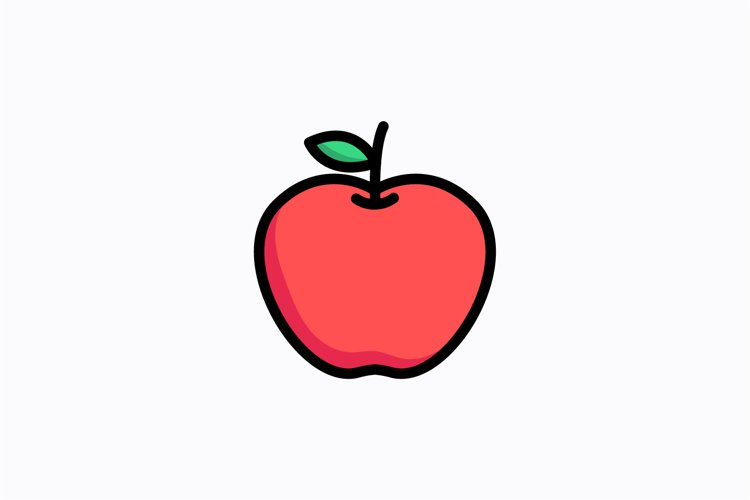

AI apple1 มีความมั่นใจ 78.44%.


In [87]:
import requests
from IPython.display import Image
from io import BytesIO
test_path = ('/content/drive/My Drive/a1.jpg')
img = keras.preprocessing.image.load_img(
test_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = predict_model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("apple1",score[0],"banana1",score[1],"mangosteen1",score[2],"orange1",score[3],"pineapple1",score[4])
display(Image(filename=test_path,width=180, height=180))
if score[0]==np.max(score) :
   fruit = "apple1"
elif score[1]==np.max(score) :
   fruit = "banana1"
elif score[2]==np.max(score) :
   fruit = "mangosteen1"
elif score[3]==np.max(score) :
   fruit = "orange1"
elif score[4]==np.max(score) :
   fruit = "pineapple1"
print(
"AI {} มีความมั่นใจ {:.2f}%."
.format(fruit, 100 * np.max(score))
)

# Test

In [88]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

In [89]:
drive.mount('/content/drive')
path = '/content/drive/My Drive/testfruit'  # ชี้ว่า data เราอยู่โฟล์เดอร์ไหน

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
# dimensions of our images
img_width, img_height = 150, 150

# Load the model we save
model = load_model('model1.h5')

['o22.png', 'o11.jpg', 'banana-fruit-500x500.png', 'cartoon-pineapple-fruit-green-leaves-cartoon-pineapple-fruit-green-leaves-vector-hand-drawn-illustration-isolated-224826940.png', 'images.png', 'banana_cavendish.png', '41nDqKsRGHL.png', 'pngtree-food-food-fruit-mangosteen-png-image_449408.jpg', 'download (1).jpg']
o22.png


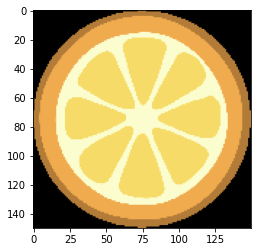

1/1 [==============================] - 0s 32ms/step
[[-0.13855095 -0.6593259   0.9604044  -0.16262484  2.2134964 ]]
pineapple1 , 221.35
o22.png: pineapple1
--------------------------------------------
o11.jpg


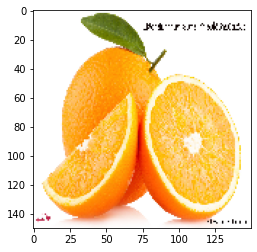

1/1 [==============================] - 0s 32ms/step
[[-0.1229182  -0.66249603  0.9501833  -0.1519104   2.206842  ]]
pineapple1 , 220.68
o11.jpg: pineapple1
--------------------------------------------
banana-fruit-500x500.png


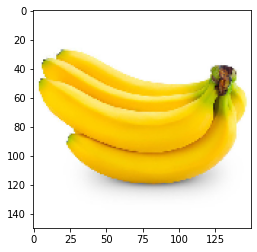

1/1 [==============================] - 0s 31ms/step
[[-0.12153311 -0.65164053  0.94832844 -0.15591991  2.187129  ]]
pineapple1 , 218.71
banana-fruit-500x500.png: pineapple1
--------------------------------------------
cartoon-pineapple-fruit-green-leaves-cartoon-pineapple-fruit-green-leaves-vector-hand-drawn-illustration-isolated-224826940.png


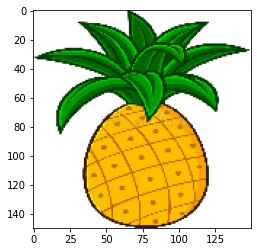

1/1 [==============================] - 0s 30ms/step
[[-0.12583019 -0.69917125  0.9648519  -0.17140129  2.2739437 ]]
pineapple1 , 227.39
cartoon-pineapple-fruit-green-leaves-cartoon-pineapple-fruit-green-leaves-vector-hand-drawn-illustration-isolated-224826940.png: pineapple1
--------------------------------------------
images.png


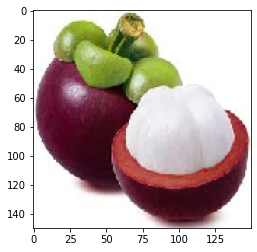

1/1 [==============================] - 0s 31ms/step
[[-0.1433677  -0.66902083  0.98834014 -0.1814839   2.233014  ]]
pineapple1 , 223.30
images.png: pineapple1
--------------------------------------------
banana_cavendish.png


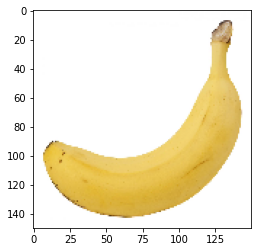

1/1 [==============================] - 0s 38ms/step
[[-0.13899626 -0.6550862   0.9665277  -0.17242235  2.2137659 ]]
pineapple1 , 221.38
banana_cavendish.png: pineapple1
--------------------------------------------
41nDqKsRGHL.png


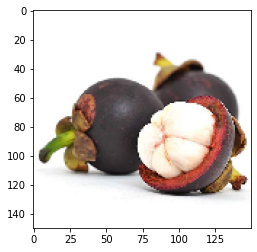

1/1 [==============================] - 0s 33ms/step
[[-0.15281172 -0.66345656  0.9906492  -0.1808016   2.2393413 ]]
pineapple1 , 223.93
41nDqKsRGHL.png: pineapple1
--------------------------------------------
pngtree-food-food-fruit-mangosteen-png-image_449408.jpg


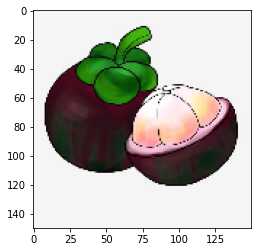

1/1 [==============================] - 0s 28ms/step
[[-0.15261616 -0.6710723   0.9910064  -0.17973599  2.257633  ]]
pineapple1 , 225.76
pngtree-food-food-fruit-mangosteen-png-image_449408.jpg: pineapple1
--------------------------------------------
download (1).jpg


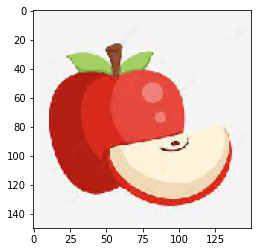

1/1 [==============================] - 0s 28ms/step
[[-0.12235461 -0.6620153   0.9645674  -0.16493252  2.1936963 ]]
pineapple1 , 219.37
download (1).jpg: pineapple1
--------------------------------------------


In [100]:
mypath = ('/content/drive/My Drive/fruit data/test/')
# Label_calss = {'apple1', 'banana1', 'mangosteen1', 'orange1', 'pineapple1'}
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles)

# Predicting images
for file in onlyfiles:
  print(file)
  img = image.load_img(mypath+file, target_size=(img_width, img_height))

  imgplot = plt.imshow(img)
  plt.show()

  x = image.img_to_array(img)
  x /= 255.0
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  # classes = model.predict_classes(images)
  print(classes)
  #classes = classes[0][0]

  if np.argmax(classes) == 0:
    print("%s , %.2f" % ("apple1", (classes[0][np.argmax(classes)]*100)))
    print(file + ": " + 'apple1')
  
  elif np.argmax(classes) == 1:
    print("%s , %.2f" % ("banana1", (classes[0][np.argmax(classes)]*100)))
    print(file + ": " + 'banana1')
  
  elif np.argmax(classes) == 2:
    print("%s , %.2f" % ("mangosteen1", (classes[0][np.argmax(classes)]*100)))
    print(file + ": " + 'mangosteen1')
  
  elif np.argmax(classes) == 3:
    print("%s , %.2f" % ("orange1", (classes[0][np.argmax(classes)]*100)))
    print(file + ": " + 'orange1')

  else:
    print("%s , %.2f" % ("pineapple1", (classes[0][np.argmax(classes)]*100)))
    print(file + ": " + 'pineapple1')

  print('--------------------------------------------')

In [65]:
mypath = ('/content/drive/My Drive/testfruit')
# Label_calss = {'apple1', 'banana1', 'mangosteen1', 'orange1', 'pineapple1'}
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles)

# Predicting images
for file in onlyfiles:
  print(file)
  img = image.load_img(mypath+file, target_size=(img_width, img_height))

  imgplot = plt.imshow(img)
  plt.show()

  x = image.img_to_array(img)
  x /= 255.0
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  # classes = model.predict_classes(images)
  print(classes)
  #classes = classes[0][0]

  if np.argmax(classes) == 0:
    print("%s , %.2f" % ("apple1", (classes[0][np.argmax(classes)]*100)))
    print(file + ": " + 'apple1')
  
  elif np.argmax(classes) == 1:
    print("%s , %.2f" % ("mangosteen1", (classes[0][np.argmax(classes)]*100)))
    print(file + ": " + 'mangosteen1')

  else :
    print("%s , %.2f" % ("pineapple1", (classes[0][np.argmax(classes)]*100)))
    print(file + ": " + 'pineapple1')
  
  print('--------------------------------------------')

['41nDqKsRGHL.png']
41nDqKsRGHL.png


FileNotFoundError: ignored

In [97]:
import requests
from IPython.display import Image
from io import BytesIO
test_path = ('/content/drive/My Drive/fruit data/test/')
img = keras.preprocessing.image.load_img(
test_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = predict_model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("apple1",score[0],"banana1",score[1],"mangosteen1",score[2],"orange1",score[3],"pineapple1",score[4])
display(Image(filename=test_path,width=180, height=180))
if score[0]==np.max(score) :
   fruit = "apple1"
elif score[1]==np.max(score) :
   fruit = "banana1"
elif score[2]==np.max(score) :
   fruit = "mangosteen1"
elif score[3]==np.max(score) :
   fruit = "orange1"
elif score[4]==np.max(score) :
   fruit = "pineapple1"
print(
"AI {} มีความมั่นใจ {:.2f}%."
.format(fruit, 100 * np.max(score))
)

IsADirectoryError: ignored